## Melakukan pembacaaan terhadap file yang akan diolah. File yang diolah berupa proporsi dari state

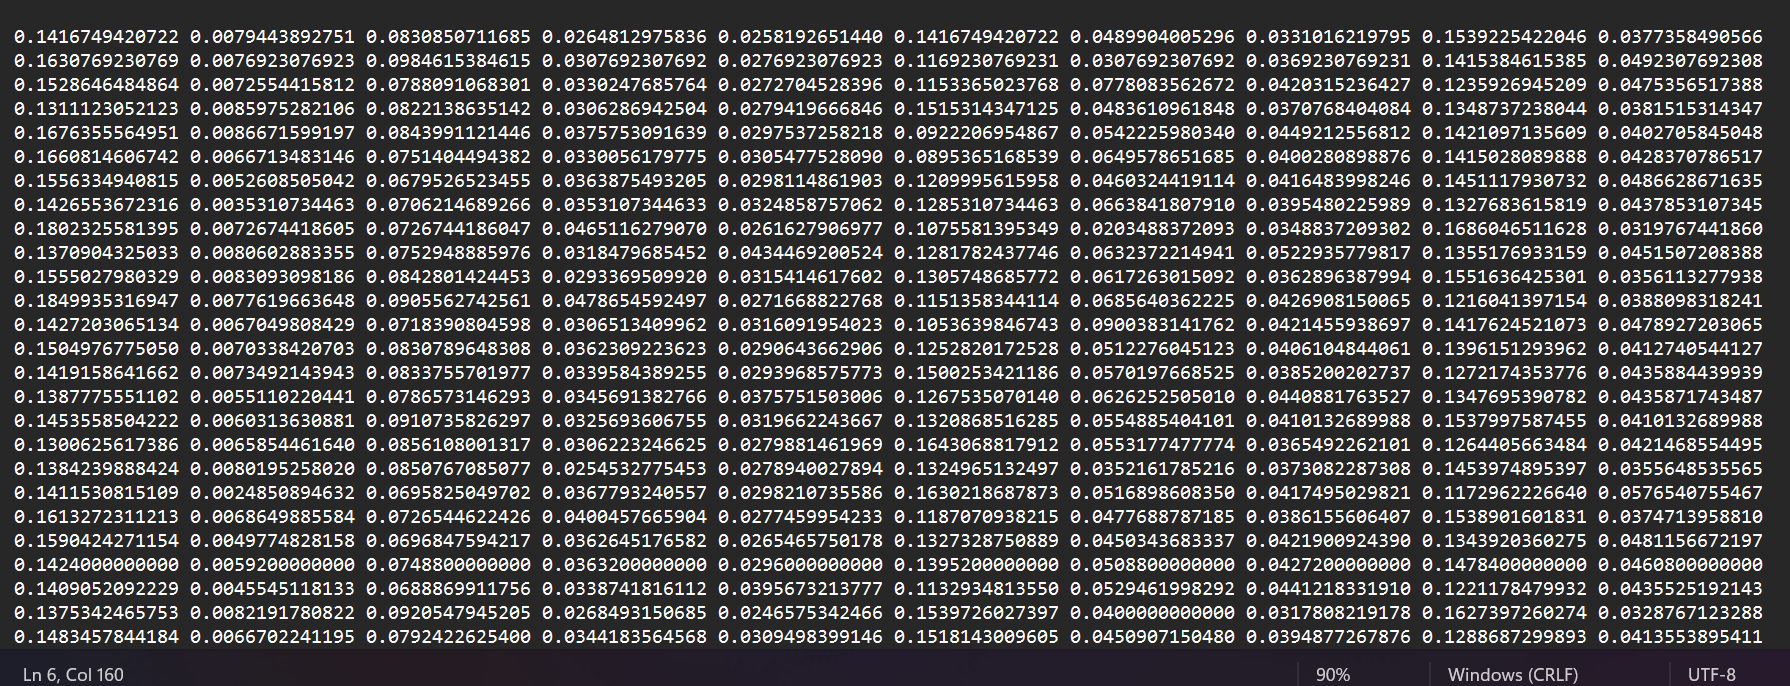
masing-masing dari kolom merepresentasikan peubah dan baris merepresentasikan state.

Berikut ini adalah pengelolaan data untuk membaca file

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

name = {
    0 : "FEMALE BREAST",
    1 : "UTERINE CERVIX",
    2 : "COLON & RECTUM",
    3 : "UTERINE CORPUS",
    4 : "LEUKEMIA",
    5 : "LUNG & BRONCHUS",
    6 : "MELANOMA OF THE SKIN",
    7 : "NON-HODGKIN LYMPHOMA",
    8 : "PROSTATE",
    9 : "URINARY BLADDER"
}
N = 51
Female_Breast = []
Uterine_Cervix = []
Colon_and_Rectum = []
Uterine_Corpus = []
Leukemia = []
Lung_and_Bronchus = []
Melanoma_of_the_Skin = []
Non_Hodgkin_Lymphoma = []
Prostate = []
Urinary_Bladder= []
list = [Female_Breast,Uterine_Cervix, Colon_and_Rectum, Uterine_Corpus, Leukemia, Lung_and_Bronchus,Melanoma_of_the_Skin,Non_Hodgkin_Lymphoma,Prostate,Urinary_Bladder]
p_values = {}
f = open('olah.txt')
for i in range(N):
    baris = f.readline()
    baris = baris.strip().split('\t')
    for i in range(len(baris)):
        list[i].append(baris[i])
f.close()

## Setelah itu dilakukan korelasi terhadap data, dan menampilkan matriks korelasi dari semua kemungkinan peubah

In [2]:
data = {
    "FEMALE BREAST" : Female_Breast,
    "UTERINE CERVIX" :Uterine_Cervix,
    "COLON & RECTUM" : Colon_and_Rectum,
    "UTERINE CORPUS" : Uterine_Corpus,
    "LEUKEMIA" : Leukemia,
    "LUNG & BRONCHUS" : Lung_and_Bronchus,
    "MELANOMA OF THE SKIN" : Melanoma_of_the_Skin,
    "NON-HODGKIN LYMPHOMA" : Non_Hodgkin_Lymphoma,
    "PROSTATE" : Prostate,
    "URINARY BLADDER" : Urinary_Bladder
}
data_frame = pd.DataFrame(data)
correlation_matrix = data_frame.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')




,FEMALE BREAST,UTERINE CERVIX,COLON & RECTUM,UTERINE CORPUS,LEUKEMIA,LUNG & BRONCHUS,MELANOMA OF THE SKIN,NON-HODGKIN LYMPHOMA,PROSTATE,URINARY BLADDER
FEMALE BREAST,1.000000,0.206343,-0.011418,0.484537,-0.319239,-0.496377,-0.084902,0.023192,0.130321,-0.190783
UTERINE CERVIX,0.206343,1.000000,0.587156,-0.233407,-0.179333,-0.151174,-0.214378,-0.274418,0.088223,-0.610287
COLON & RECTUM,-0.011418,0.587156,1.000000,-0.294775,-0.241925,0.195285,-0.309563,-0.397628,-0.024011,-0.357719
UTERINE CORPUS,0.484537,-0.233407,-0.294775,1.000000,-0.138182,-0.181468,-0.039262,0.316041,-0.106353,0.184873
LEUKEMIA,-0.319239,-0.179333,-0.241925,-0.138182,1.000000,-0.195376,0.161260,0.588944,-0.090231,0.132368
LUNG & BRONCHUS,-0.496377,-0.151174,0.195285,-0.181468,-0.195376,1.000000,-0.411149,-0.300764,-0.327643,0.182393
MELANOMA OF THE SKIN,-0.084902,-0.214378,-0.309563,-0.039262,0.161260,-0.411149,1.000000,0.296662,0.025260,0.162514
NON-HODGKIN LYMPHOMA,0.023192,-0.274418,-0.397628,0.316041,0.588944,-0.300764,0.296662,1.000000,-0.248960,0.545597
PROSTATE,0.130321,0.088223,-0.024011,-0.106353,-0.090231,-0.327643,0.025260,-0.248960,1.000000,-0.240008
URINARY BLADDER,-0.190783,-0.610287,-0.357719,0.184873,0.132368,0.182393,0.162514,0.545597,-0.240008,1.000000


In [6]:
def t_two_tail_test(f,index_var_1,index_var_2,pearson,alpha=0.05):
    t_hit = pearson*np.sqrt(N-2)/np.sqrt(1-pearson**2)
    p_value = 2 * (1 - t.cdf(abs(t_hit),N-2))
    p_values[(name[index_var_1],name[index_var_2])] = p_value
    f.write(f"H0: State yang memiliki kasus baru dari jenis kanker {name[index_var_1]} tidak memiliki korelasi dengan kasus baru dari jenis kanker {name[index_var_2]}.\n")
    f.write(f"H1: State yang memiliki kasus baru dari jenis kanker {name[index_var_1]} memiliki korelasi dengan kasus baru dari jenis kanker {name[index_var_2]}.\n")
    f.write(f"Koefisien Pearson = {round(pearson,4)}\n")
    if pearson > 0:
        f.write(f"t_hitung = {round(pearson,4)}*sqrt({N}-2)/sqrt(1-{round(pearson,4)}^2)\n")    
    else:
        f.write(f"t_hitung = {round(pearson,4)}*sqrt({N}-2)/sqrt(1-({round(pearson,4)})^2)\n")
    f.write(f"t_hitung = {round(t_hit,4)}\n")
    f.write("Kemudian didapatkan nilai p-value sebagai berikut\n")
    f.write(f"p-value = {round(p_value,4)}\n")

    if p_value < alpha:
        f.write("Karena p-value < alpha maka\n")
        f.write("Tolak H0.\n")
        f.write(f"Dengan taraf nyata {int(alpha*100)}%, dapat disimpulkan bahwa terdapat korelasi antara kasus baru dari jenis kanker {name[index_var_1]} dengan kasus baru dari jenis kanker {name[index_var_2]}.\n")
    else:
        f.write("Karena p-value > alpha maka\n")
        f.write("Gagal tolak H0\n")
        f.write(f"Dengan taraf nyata {int(alpha*100)}%, dapat disimpulkan bahwa tidak ada korelasi antara kasus baru dari jenis kanker {name[index_var_1]} dengan kasus baru dari jenis kanker {name[index_var_2]}.\n")

In [8]:
f = open("Uji Hipotesis.txt",'w')
counter = 1
for i in range(10):
    for j in range(i+1,10):
        f.write(str(counter))
        f.write("\n")
        counter += 1
        t_two_tail_test(f,i,j,correlation_matrix.iloc[i,j],0.05)
        f.write("\n")
        f.write("\n")
        f.write("\n")
f.close()

In [ ]:
Berikut adalah nilai p-value untuk masing-masing pasangan

In [9]:
for key in p_values:
    print(f"{str(key):^50} {round(p_values[key],4):^5}")

       ('FEMALE BREAST', 'UTERINE CERVIX')         0.1463
       ('FEMALE BREAST', 'COLON & RECTUM')         0.9366
       ('FEMALE BREAST', 'UTERINE CORPUS')         0.0003
          ('FEMALE BREAST', 'LEUKEMIA')            0.0224
       ('FEMALE BREAST', 'LUNG & BRONCHUS')        0.0002
    ('FEMALE BREAST', 'MELANOMA OF THE SKIN')      0.5536
    ('FEMALE BREAST', 'NON-HODGKIN LYMPHOMA')      0.8717
          ('FEMALE BREAST', 'PROSTATE')            0.362
       ('FEMALE BREAST', 'URINARY BLADDER')        0.1799
       ('UTERINE CERVIX', 'COLON & RECTUM')         0.0 
       ('UTERINE CERVIX', 'UTERINE CORPUS')        0.0993
          ('UTERINE CERVIX', 'LEUKEMIA')           0.208
      ('UTERINE CERVIX', 'LUNG & BRONCHUS')        0.2896
    ('UTERINE CERVIX', 'MELANOMA OF THE SKIN')     0.1309
    ('UTERINE CERVIX', 'NON-HODGKIN LYMPHOMA')     0.0513
          ('UTERINE CERVIX', 'PROSTATE')           0.5381
      ('UTERINE CERVIX', 'URINARY BLADDER')         0.0 
       ('COLON & R

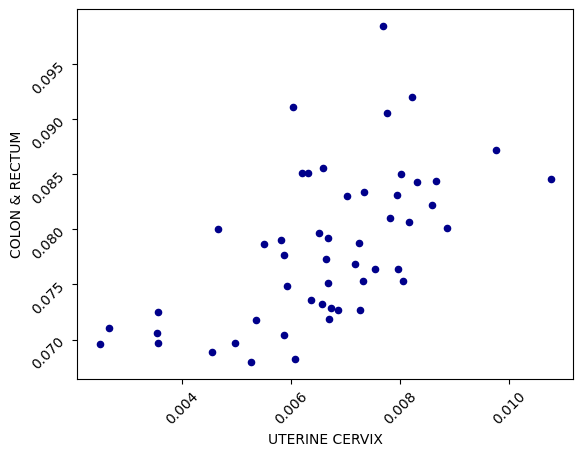

In [20]:
data2 = {
    "UTERINE CERVIX" :[round(float(num),10) for num in Uterine_Cervix],
    "COLON & RECTUM" : [round(float(num),10) for num in Colon_and_Rectum]
}

# data2 = {
#     "UTERINE CERVIX" :Uterine_Cervix,
#     "COLON & RECTUM" : Colon_and_Rectum
# }
data_frame2 = pd.DataFrame(data2)

# data_frame2.plot.scatter(x="UTERINE CERVIX",y="COLON & RECTUM")
# data_frame2.plot.scatter(x=data_frame2.columns[0], y=data_frame2.columns[1], c='DarkBlue')

import matplotlib.pyplot as plt

data_frame2.plot.scatter(x=data_frame2.columns[0], y=data_frame2.columns[1], c='DarkBlue')
plt.xticks(rotation=45)  # Adjust the rotation of x-axis labels if needed
plt.yticks(rotation=45)  # Adjust the rotation of y-axis labels if needed
plt.show()
